[Airline Satisfaction Analysis](https://codefinity.com/workspaces/9cadc293-0525-4b03-89a2-ed4842f35840)

**Import all necessary libraries**

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn import ensemble, metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

**Initial Data Examination**

In [2]:
# Load dataset from CSV file into DataFrame
airline_df = pd.read_csv('airline.csv', index_col=0)

# Display first five rows of DataFrame
airline_df.head()

# Display last five rows of DataFrame
# airline_df.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
0,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
2,Male,Loyal Customer,43,Business travel,Business,1963,3,3,3,3,...,5,5,5,5,4,5,4,0,0.0,satisfied
3,Female,Loyal Customer,38,Business travel,Business,2822,2,2,5,2,...,5,5,5,5,3,5,4,13,0.0,satisfied
4,Male,disloyal Customer,24,Business travel,Eco,453,2,2,2,4,...,5,2,4,4,2,4,5,16,30.0,neutral or dissatisfied


**Handling Missing Values and Data Cleaning**

In [3]:
# Calculate the count of null values for columns with missing values
null_count = airline_df.loc[:, airline_df.isna().sum() > 0].isna().sum()

# Create a DataFrame to display the count and percentage of null values
display(pd.DataFrame({'null_count': null_count, 'null_percent': null_count / airline_df.shape[0] * 100}))

,null_count,null_percent
Arrival Delay in Minutes,136,0.314131


In [4]:
# Fill missing values in the 'Arrival Delay in Minutes' column with the mean value
airline_df['Arrival Delay in Minutes'] = airline_df['Arrival Delay in Minutes'].fillna(
    value=airline_df['Arrival Delay in Minutes'].mean())

# Calculate the count of missing values in each column
display(airline_df.isna().sum())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [5]:
# Convert column names to lowercase and replace spaces with underscores
airline_df.columns = airline_df.columns.str.lower().str.replace(' ', '_')

# Get the array of column names
display(airline_df.columns.values)

array(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding',
       'seat_comfort', 'inflight_entertainment', 'on-board_service',
       'leg_room_service', 'baggage_handling', 'checkin_service',
       'inflight_service', 'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes', 'satisfaction'], dtype=object)

In [6]:
# Display summary information about the dataset
display(airline_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43294 entries, 0 to 43293
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             43294 non-null  object 
 1   customer_type                      43294 non-null  object 
 2   age                                43294 non-null  int64  
 3   type_of_travel                     43294 non-null  object 
 4   class                              43294 non-null  object 
 5   flight_distance                    43294 non-null  int64  
 6   inflight_wifi_service              43294 non-null  int64  
 7   departure/arrival_time_convenient  43294 non-null  int64  
 8   ease_of_online_booking             43294 non-null  int64  
 9   gate_location                      43294 non-null  int64  
 10  food_and_drink                     43294 non-null  int64  
 11  online_boarding                    43294 non-null  int64  


None

**Data Type Conversion and Summary Analysis**

In [7]:
# Select categorical columns excluding specified numerical and target columns
categorical_columns = airline_df.columns[~airline_df.columns.isin(
    ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'satisfaction'])]

# Convert selected columns to categorical data type
airline_df[categorical_columns] = airline_df[categorical_columns].astype('category')

# Display updated summary information about the dataset after converting columns to categorical
# display(airline_df.info())

# Generate descriptive statistics for numerical columns in the dataset
# display(airline_df.describe())

# Generate descriptive statistics for categorical columns in the dataset
display(airline_df.describe(include=['category']))

,gender,customer_type,type_of_travel,class,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
count,43294,43294,43294,43294,43294,43294,43294,43294,43294,43294,43294,43294,43294,43294,43294,43294,43294,43294
unique,2,2,2,3,6,6,6,5,6,6,5,6,6,6,5,5,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,2,3,4,4,4,4,4,4,4,4,4,4
freq,21987,35417,29929,20700,10787,10576,10056,11878,10292,12798,13330,12304,12908,11849,15542,12023,15776,11349


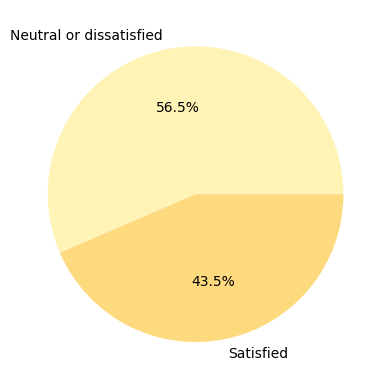

In [8]:
# Create a pie chart to visualize the distribution of satisfaction levels
plt.pie(airline_df.satisfaction.value_counts(), labels=["Neutral or dissatisfied", "Satisfied"],
        colors=sns.color_palette("YlOrBr"), autopct='%1.1f%%');

**Correlation and Multicollinearity Analysis**

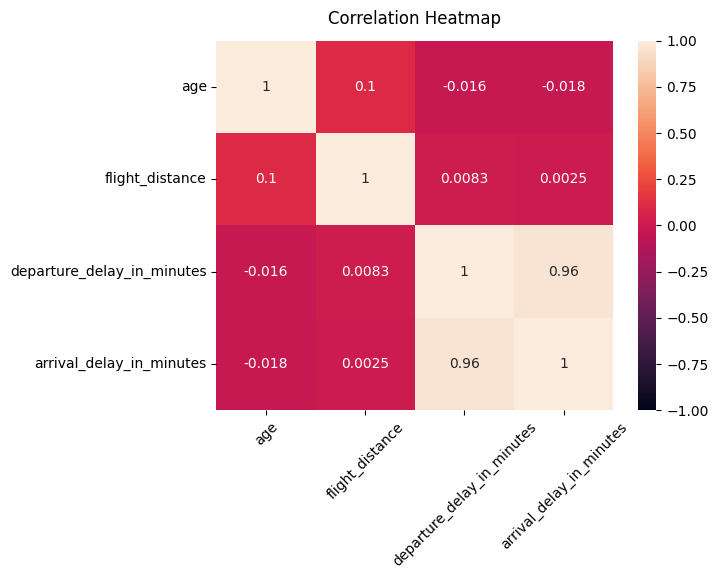

In [9]:
# Generate a heatmap to visualize the correlation matrix of numerical features
heatmap = sns.heatmap(airline_df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

# Set title and adjust properties
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45);

In [10]:
# Create an empty DataFrame to store Variance Inflation Factor (VIF) values
vif_df = pd.DataFrame()

# Select numerical columns for VIF calculation
features = airline_df.select_dtypes(include='number').columns

# Assign selected features to the 'feature' column in the DataFrame
vif_df["feature"] = features

# Calculate VIF values for each feature and store them in the 'VIF' column
vif_df["VIF"] = [variance_inflation_factor(airline_df[features].values, i) for i in range(len(features))]

# Display the DataFrame containing feature names and their corresponding VIF values
display(vif_df)

,feature,VIF
0,age,2.292531
1,flight_distance,2.212611
2,departure_delay_in_minutes,14.181102
3,arrival_delay_in_minutes,14.216816


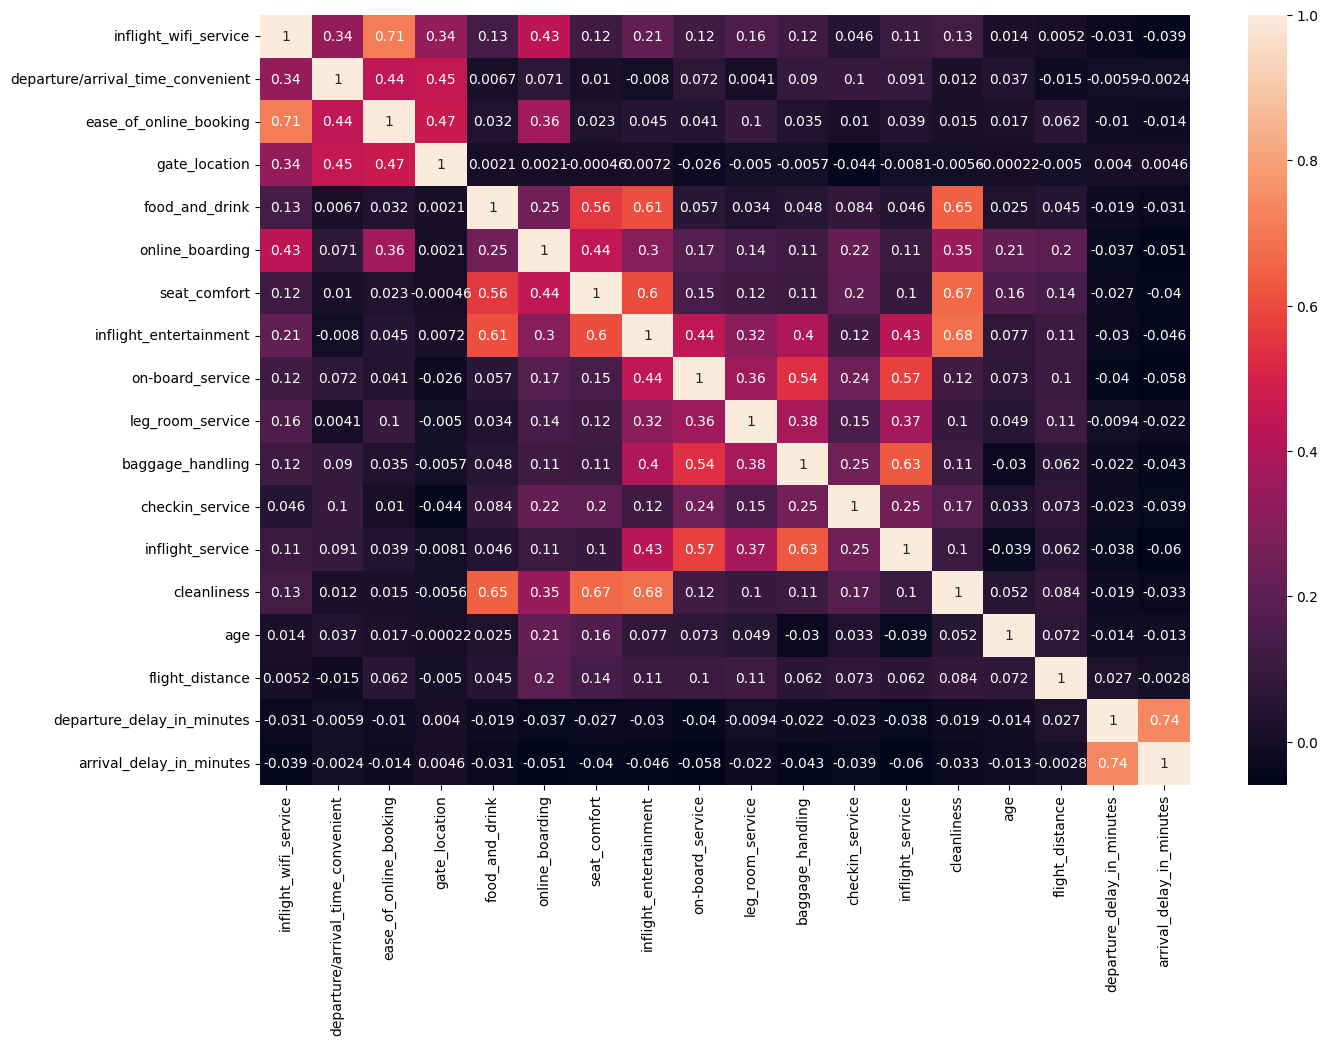

In [11]:
# Select categorical columns and convert them to integer type
ordinal_df = airline_df.select_dtypes('category').loc[:, 'inflight_wifi_service':].astype(int)

# Merge ordinal and continuous features
ordinal_continuous = ordinal_df.merge(airline_df.select_dtypes(np.number), left_index=True, right_index=True)

# Create a heatmap to visualize the Spearman correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(ordinal_continuous.corr(method='spearman'), annot=True);

In [12]:
# Create a mapping dictionary for encoding satisfaction levels
satisfaction_mapping = {v: k for k, v in enumerate(airline_df['satisfaction'].unique())}

# {'neutral or dissatisfied': 0, 'satisfied': 1}

# Map satisfaction levels using the previously created mapping dictionary
airline_df['satisfaction'] = airline_df['satisfaction'].map(satisfaction_mapping)

# Display the first few entries of the 'satisfaction' column after mapping
display(airline_df['satisfaction'].head())

id
0    0
1    1
2    1
3    1
4    0
Name: satisfaction, dtype: int64

**Visualizing Satisfaction Across Different Categories**

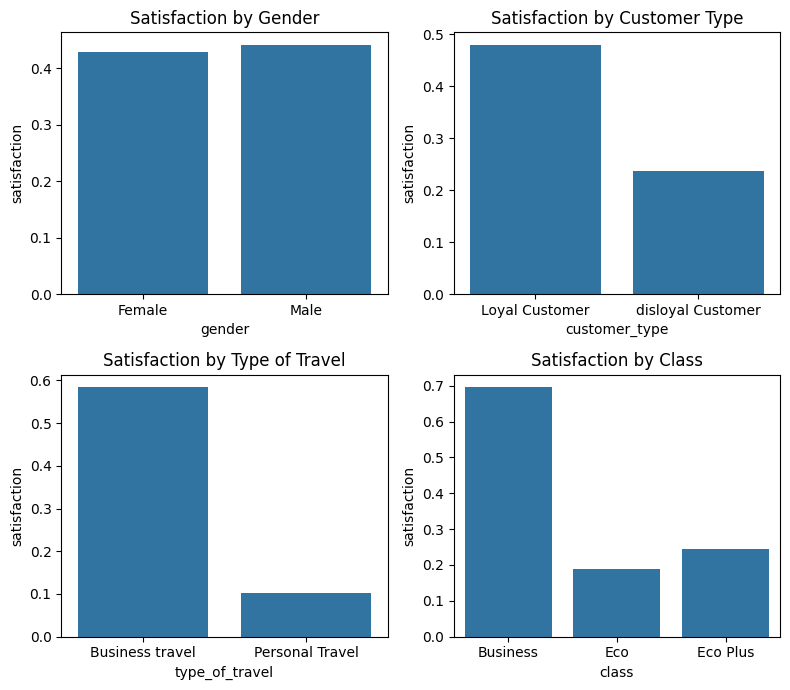

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 7))

# Create the first bar plot for gender vs satisfaction
sns.barplot(ax=axes[0, 0], x='gender', y='satisfaction', data=airline_df, errorbar=None)
axes[0, 0].set_title('Satisfaction by Gender')

# Create the second bar plot for customer type vs satisfaction
sns.barplot(ax=axes[0, 1], x='customer_type', y='satisfaction', data=airline_df, errorbar=None)
axes[0, 1].set_title('Satisfaction by Customer Type')

# Create the third bar plot for type of travel vs satisfaction
sns.barplot(ax=axes[1, 0], x='type_of_travel', y='satisfaction', data=airline_df, errorbar=None)
axes[1, 0].set_title('Satisfaction by Type of Travel')

# Create the fourth bar plot for class vs satisfaction
sns.barplot(ax=axes[1, 1], x='class', y='satisfaction', data=airline_df, errorbar=None)
axes[1, 1].set_title('Satisfaction by Class')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Statistical Correlation Between Nominal Features and Satisfaction**


In [14]:
# Define a function to calculate the chi-squared test statistic and p-value
def get_correlation_nominal(column: str, alpha=0.05, target_column: str = 'satisfaction'):
    contingency_table = pd.crosstab(airline_df[column], airline_df[target_column])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    return p, p <= alpha

# Specify nominal columns for correlation analysis
nominal_columns = ['gender', 'customer_type', 'type_of_travel', 'class']

# Initialize lists to store p-values and correlation indicators
p_list, is_correlated_list = [], []

for c in nominal_columns:
    # Calculate the p-value and correlation indicator using the defined function
    p, is_correlated = get_correlation_nominal(c)
    # Append the results to the respective lists
    p_list.append(p)
    is_correlated_list.append(is_correlated)

# Create a DataFrame to display the p-values and correlation indicators for each nominal column
display(pd.DataFrame({'p_value': p_list, 'is_correlated': is_correlated_list}, index=nominal_columns))

,p_value,is_correlated
gender,0.009381,True
customer_type,0.000000,True
type_of_travel,0.000000,True
class,0.000000,True


**Satisfaction Analysis Across Age Groups**

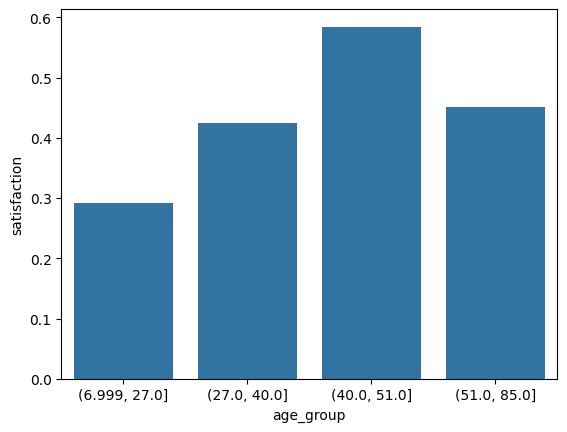

In [15]:
# Create age groups based on quartiles of the 'age' column
airline_df['age_group'] = pd.qcut(airline_df['age'], 4)

# Visualize satisfaction levels across age groups using a bar plot
sns.barplot(x='age_group', y='satisfaction', data=airline_df, errorbar=None);

In [16]:
# Encode age groups numerically by converting categorical codes to integers and incrementing by 1
airline_df['age_group'] = airline_df['age_group'].cat.codes + 1

# Display the first few entries of the 'age_group' column after encoding
display(airline_df['age_group'])


id
0        3
1        3
2        3
3        2
4        1
        ..
43289    3
43290    1
43291    2
43292    3
43293    1
Name: age_group, Length: 43294, dtype: int8

**Dataset Refinement and Train-Test Split**

In [17]:
# Drop specified columns from the dataset
airline_df = airline_df.drop(columns=['arrival_delay_in_minutes', 'inflight_entertainment', 'age'])

# Display the first few rows of the updated dataset
display(airline_df.head())

,gender,customer_type,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,seat_comfort,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction,age_group
id,,,,,,,,,,,,,,,,,,,,,
0,Male,disloyal Customer,Business travel,Business,821,3,3,3,3,5,...,5,3,2,5,4,5,5,2,0,3
1,Male,Loyal Customer,Business travel,Business,1905,2,2,2,2,4,...,5,5,5,5,3,5,4,0,1,3
2,Male,Loyal Customer,Business travel,Business,1963,3,3,3,3,5,...,5,5,5,5,4,5,4,0,1,3
3,Female,Loyal Customer,Business travel,Business,2822,2,2,5,2,2,...,4,5,5,5,3,5,4,13,1,2
4,Male,disloyal Customer,Business travel,Eco,453,2,2,2,4,5,...,5,2,4,4,2,4,5,16,0,1


In [18]:
# Convert categorical variables into dummy variables and drop the first category to prevent multicollinearity
airline_df = pd.get_dummies(airline_df, columns=['gender', 'customer_type', 'type_of_travel', 'class'], drop_first=True)

# Convert column names to lowercase and replace spaces with underscores for consistency
airline_df.columns = airline_df.columns.str.lower().str.replace(' ', '_')

# Display the first few rows of the updated dataset
display(airline_df.head())

,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,on-board_service,leg_room_service,...,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction,age_group,gender_male,customer_type_disloyal_customer,type_of_travel_personal_travel,class_eco,class_eco_plus
id,,,,,,,,,,,,,,,,,,,,,
0,821,3,3,3,3,5,3,5,3,2,...,5,5,2,0,3,True,True,False,False,False
1,1905,2,2,2,2,4,4,5,5,5,...,5,4,0,1,3,True,False,False,False,False
2,1963,3,3,3,3,5,4,5,5,5,...,5,4,0,1,3,True,False,False,False,False
3,2822,2,2,5,2,2,5,4,5,5,...,5,4,13,1,2,False,False,False,False,False
4,453,2,2,2,4,5,2,5,2,4,...,4,5,16,0,1,True,True,False,True,False


**Split the data into training and testing sets**

In [19]:
# Split the dataset into features (X) and target variable (y)
X, y = airline_df.drop(columns=['satisfaction']), airline_df['satisfaction']

# Split the data into training and testing sets, with 10% for testing and stratified sampling based on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1234)

**Model Evaluation and Comparison**

1) K-Nearest Neighbors classifier

In [20]:
# Define a function to plot the confusion matrix for a classifier
def plot_confusion_matrix(classifier):
    
    # Predict the classes using the classifier on the test data
    predicted = classifier.predict(X_test)
    
    # Compute the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)
    
    # Define group names for the confusion matrix
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    
    # Flatten the confusion matrix and format group counts
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    
    # Calculate percentages and format them
    group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix.flatten() / np.sum(confusion_matrix)]
    
    # Create labels for the confusion matrix cells
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    
    # Reshape labels to match confusion matrix shape
    labels = np.asarray(labels).reshape(2, 2)
    
    # Calculate classification performance metrics
    accuracy = np.trace(confusion_matrix) / float(np.sum(confusion_matrix))
    precision = confusion_matrix[1, 1] / sum(confusion_matrix[:, 1])
    recall = confusion_matrix[1, 1] / sum(confusion_matrix[1, :])
    f1_score = 2 * precision * recall / (precision + recall)
    
    # Generate text with performance metrics
    stats_text = f"\n\nAccuracy={accuracy:.2%}\nPrecision={precision:.2%}\nRecall={recall:.2%}\nF1 Score={f1_score:.2%}"
    
    # Plot the confusion matrix using seaborn heatmap
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    
    # Set x-axis label with performance metrics
    plt.xlabel(stats_text)

In [21]:
# Define a pipeline for K-Nearest Neighbors classifier with standard scaling
knn_pipe = Pipeline([('sc', StandardScaler()), ('knn', KNeighborsClassifier())])

# Define hyperparameter grid for grid search
param_grid = {'knn__n_neighbors': range(1, 30)}

# Initialize grid search with cross-validation
knn_gs = GridSearchCV(knn_pipe, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

# Perform grid search on training data
knn_gs.fit(X_train, y_train)

# Print best accuracy and corresponding parameters found by grid search
print(f'Best accuracy: {knn_gs.best_score_:.2%}, best params: {knn_gs.best_params_}')

# Evaluate test accuracy of the best model
print(f'Test accuracy: {knn_gs.score(X_test, y_test):.2%}')

Best accuracy: 92.05%, best params: {'knn__n_neighbors': 9}
Test accuracy: 92.47%


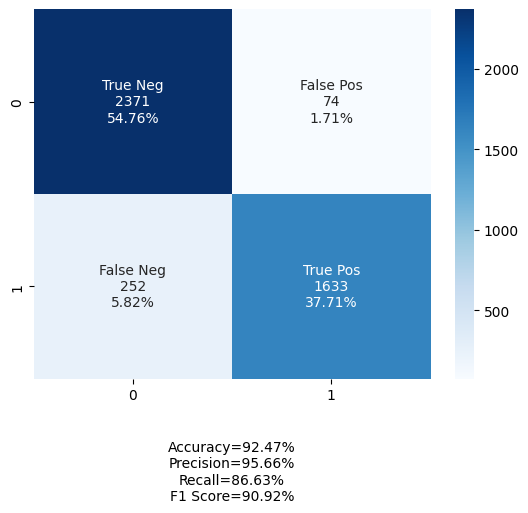

In [22]:
# Plot the confusion matrix for the K-Nearest Neighbors classifier
plot_confusion_matrix(knn_gs)

2) Logistic Regression classifier

Best accuracy: 87.44%, best params: {'lr__C': 0.05}
Test accuracy: 87.34%


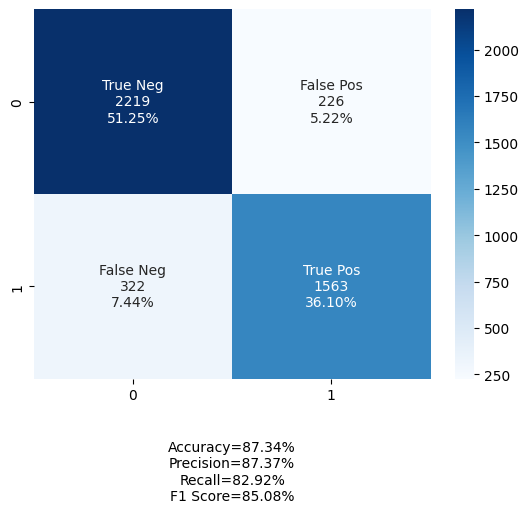

In [23]:
# Define a pipeline for Logistic Regression classifier with standard scaling
logistic_regression_pipe = Pipeline([('sc', StandardScaler()), ('lr', LogisticRegression())])

# Define hyperparameter grid for grid search
param_grid = {'lr__C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]}

# Initialize grid search with cross-validation
logistic_regression_gs = GridSearchCV(logistic_regression_pipe, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

# Perform grid search on training data
logistic_regression_gs.fit(X_train, y_train)

# Print best accuracy and corresponding parameters found by grid search
print(f'Best accuracy: {logistic_regression_gs.best_score_:.2%}, best params: {logistic_regression_gs.best_params_}')

# Evaluate test accuracy of the best model
print(f'Test accuracy: {logistic_regression_gs.score(X_test, y_test):.2%}')

# Plot the confusion matrix for the Logistic Regression classifier
plot_confusion_matrix(logistic_regression_gs)

3) Random Forest

Test accuracy: 95.75%, best number of trees: 170


Text(0, 0.5, 'Accuracy')

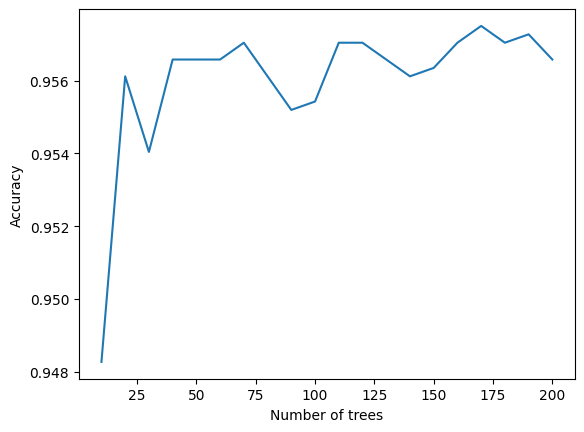

In [24]:
# Define range of estimators (number of trees) for Random Forest
estimators = range(10, 201, 10)

# Initialize variables to track the best model
best_accuracy = 0
best_forest = None
best_n = 0
accuracies = []

for n_estimators in estimators:
    
    # Create Random Forest classifier with specified number of trees
    random_forest = ensemble.RandomForestClassifier(n_estimators=n_estimators, random_state=1234)
    
    # Train the classifier on the training data
    random_forest.fit(X_train, y_train)
    
    # Evaluate the accuracy on the test data
    accuracy = random_forest.score(X_test, y_test)
    
    # Append accuracy to list of accuracies
    accuracies.append(accuracy)
    
    # Update the best accuracy and corresponding model if current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_forest = random_forest
        best_n = n_estimators

# Print the best test accuracy and corresponding number of trees
print(f'Test accuracy: {best_accuracy:.2%}, best number of trees: {best_n}')

# Plot the relationship between the number of trees and accuracy
plt.plot(estimators, accuracies)
# Set the label for the x-axis
plt.xlabel('Number of trees')
# Set the label for the y-axis
plt.ylabel('Accuracy')

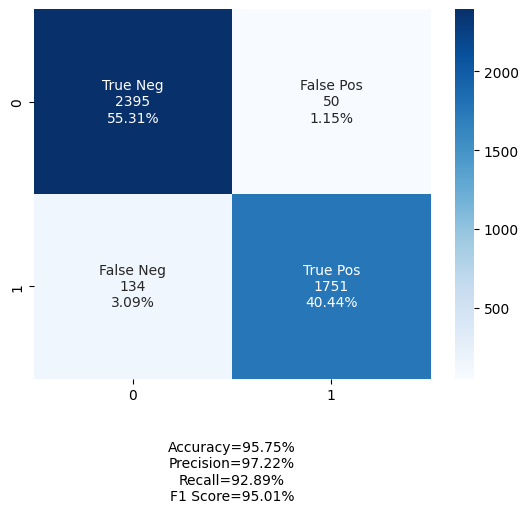

In [25]:
# Plot the confusion matrix for the Random Forest classifier
plot_confusion_matrix(best_forest)

**Evaluation metrics for classifiers**

In [26]:
# Define a function to calculate evaluation metrics for classifiers
def get_score_list(classifiers, X_data, y_data):
    # Predict classes for the input data using each classifier
    predicted = {c: c.predict(X_data) for c in classifiers}
    
    # Define a list of evaluation metrics to compute
    metrics_list = [metrics.accuracy_score, metrics.precision_score, metrics.recall_score, metrics.f1_score]
    
    # Initialize an empty list to store evaluation metric results
    result = []
    
    for c in classifiers:
        # Compute evaluation metrics for the classifier and store them in a list
        result.append([metric(y_data, predicted[c]) for metric in metrics_list])
    return result

# List of classifiers to evaluate
classifiers_list = [knn_gs, logistic_regression_gs, best_forest]

# Create a DataFrame to display evaluation metric results
display(pd.DataFrame(get_score_list(classifiers_list, X_test, y_test),
             columns=['accuracy', 'precision', 'recall', 'f1_score'],
             index=['knn', 'logistic_regression', 'random_forest']).sort_values(by='accuracy', ascending=False))

,accuracy,precision,recall,f1_score
random_forest,0.957506,0.972238,0.928912,0.950081
knn,0.924711,0.956649,0.866313,0.909243
logistic_regression,0.873441,0.873672,0.829178,0.850844
